# Higher Diploma in Science in Computing (Data Analytics)  

**University**: [Atlantic Technological University (ATU)](https://www.atu.ie/)  
**Module:** Computer Infrastructure  
**Lecturer:** [Ian McLoughlin](https://github.com/ianmcloughlin)  
**Author:** [Elaine R. Cazetta](https://github.com/elainecazetta)  

---

# Project: FAANG Stock Data Analysis with yfinance  
This notebook demonstrates how to download, store, and visualize [FAANG](https://www.investopedia.com/terms/f/faang-stocks.asp) stock data using Python and the yfinance package. It also shows how to structure a reusable function and automate plotting for further analysis.

---

## 🔹Problem 1 – Data from yfinance

---

### - Requirements:

Using the [yfinance](https://github.com/ranaroussi/yfinance) Python package, write a function called `get_data()` that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

The function should save the data into a folder called `data` in the root of your repository using a filename with the format `YYYYMMDD-HHmmss.csv` where `YYYYMMDD` is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. `09` for September), followed by the two digit day, and `HHmmss` is hour, minutes, seconds.
Create the `data` folder if you don't already have one.

---

### - Overview of the Solution:  

The following steps show how to import the necessary libraries, download hourly FAANG stock data for the past five days using the yfinance package, and save it to a timestamped CSV file inside the `data` folder.

In [1]:
# Import libraries

# Data Frames
import pandas as pd

# Yahoo Finance data
import yfinance as yf

# Dates and Times
import datetime as dt

In [2]:
# List of FAANG tickers
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

In [3]:
# Download FAANG stocks data and assign it to a dataframe:
df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')
df.head(3) # show the first 3 rows

/tmp/ipykernel_6099/1249406616.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-04 14:30:00+00:00  268.429993  253.389999  280.269989  635.355774   
2025-11-04 15:30:00+00:00  270.609985  252.440094  279.376099  631.979980   
2025-11-04 16:30:00+00:00  270.010010  250.955002  278.250000  631.544983   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-11-04 14:30:00+00:00  1098.313965  269.589996  255.440002  281.075012   
2025-11-04 15:30:00+00:00  1092.555054  271.000000  253.565002  281.833588   
2025-11-04 16:30:00+00:00  1095.069946  271.485992  252.535095  279.549988   

Price                                               ...        Open  \
Ticker                           META         NFLX  ...        AAPL   
Datetime                                            ...               
2025-11-04 14:30:00+00:00  641.739929  1104.599854  ...  268.242493   
2025-11-04 15:30:00+00:00  638.799988  1103.500000  ...  268.429993   
2025-11-04 16:30:00+00:00  633.450012  1096.719971  ...  270.640015   

Price                                                                       \
Ticker                           AMZN        GOOG        META         NFLX   
Datetime                                                                     
2025-11-04 14:30:00+00:00  250.380005  277.070007  628.039978  1099.285034   
2025-11-04 15:30:00+00:00  253.369995  280.220490  635.270020  1098.209961   
2025-11-04 16:30:00+00:00  252.429993  279.230011  631.992004  1092.359985   

Price                       Volume                                      
Ticker                        AAPL      AMZN     GOOG     META    NFLX  
Datetime                                                                
2025-11-04 14:30:00+00:00  9645778  10799520  3778209  5424088  626099  
2025-11-04 15:30:00+00:00  3278354   4292114  1285824  2766300  300006  
2025-11-04 16:30:00+00:00  3846826   2839567  1038904  1369778  226854  

[3 rows x 25 columns]

### - The `Data` Directory:  
This step uses Python’s built-in `os` module to create a folder named `data`. This directory will store the CSV files downloaded from Yahoo Finance. The `os.makedirs()` function is used with the `exist_ok=True` argument to ensure the folder is created if it doesn’t already exist, avoiding any errors if it’s run multiple times.

In [4]:
# Import the os module and create 'data' folder if it doesn't exist
# Reference: https://docs.python.org/3/library/os.html
# Reference: OpenAI
import os

os.makedirs("data", exist_ok=True)

In [5]:
# Save dataframe to CSV
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
df.to_csv('data/data.csv')

### - Dates and Times:   
To create unique filenames, a timestamp is generated using Python’s `datetime` module [(reference: official documentation)](https://docs.python.org/3/library/datetime.html). This guarantees that each dataset is saved with a distinctive and descriptive name.

In [6]:
# Get the current date and time using the datetime module
now = dt.datetime.now()

# Display the current date and time
now

datetime.datetime(2025, 11, 11, 13, 17, 31, 149616)

In [7]:
# Format the current date and time as a string: YYYYMMDD-HHmmss
# This format will be used in the filename
now.strftime("%Y%m%d-%H%M%S")

'20251111-131731'

In [8]:
# Create a unique filename that includes the timestamp
# The file will be saved inside the 'data' folder as a CSV file
filename = "data/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv"
print(filename)

data/20251111-131731.csv


In [9]:
# Save the downloaded dataframe (df) to the CSV file
# This will store the FAANG stock data in the 'data' folder
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
df.to_csv(filename)

### - Complete Function: `get_data()`    

Below is the final version of the `get_data()` function that combines all the steps demonstrated earlier. This function downloads hourly stock data for the five FAANG companies for the previous five days, creates a timestamped filename using the `datetime` module, saves the dataset as a CSV file inside the `data` folder, and ensures that the folder exists before saving.

In [10]:
# Script of the `get_data()` function

def get_data():
# References: 
# https://www.w3schools.com/python/python_functions.asp
# https://docs.python.org/3/tutorial/controlflow.html#defining-functions
# OpenAI
    """
    Downloads hourly stock data for the previous five days 
    for the FAANG companies and saves it as a timestamped CSV file.
    """
    
    # Import libraries inside the function
    import yfinance as yf
    import datetime as dt
    import os
  
    # Download hourly data for the last 5 days of FAANG tickers
    df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')

    # Create 'data' folder if it doesn't exist
    # Ref: https://docs.python.org/3/library/os.html
    # Ref: OpenAI
    os.makedirs("data", exist_ok=True)

    # Generate filename with timestamp
    filename = "data/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv"

    # Save data to CSV
    df.to_csv(filename)

    # Print confirmation message
    print(f"Data saved to {filename}")

    # Return the downloaded DataFrame
    return df

# Example usage
df = get_data()
df.head(3)

/tmp/ipykernel_6099/3478650145.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')
[*********************100%***********************]  5 of 5 completed

Data saved to data/20251111-131731.csv


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-04 14:30:00+00:00  268.429993  253.389999  280.269989  635.355774   
2025-11-04 15:30:00+00:00  270.609985  252.440094  279.376099  631.979980   
2025-11-04 16:30:00+00:00  270.010010  250.955002  278.250000  631.544983   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-11-04 14:30:00+00:00  1098.313965  269.589996  255.440002  281.075012   
2025-11-04 15:30:00+00:00  1092.555054  271.000000  253.565002  281.833588   
2025-11-04 16:30:00+00:00  1095.069946  271.485992  252.535095  279.549988   

Price                                               ...        Open  \
Ticker                           META         NFLX  ...        AAPL   
Datetime                                            ...               
2025-11-04 14:30:00+00:00  641.739929  1104.599854  ...  268.242493   
2025-11-04 15:30:00+00:00  638.799988  1103.500000  ...  268.429993   
2025-11-04 16:30:00+00:00  633.450012  1096.719971  ...  270.640015   

Price                                                                       \
Ticker                           AMZN        GOOG        META         NFLX   
Datetime                                                                     
2025-11-04 14:30:00+00:00  250.380005  277.070007  628.039978  1099.285034   
2025-11-04 15:30:00+00:00  253.369995  280.220490  635.270020  1098.209961   
2025-11-04 16:30:00+00:00  252.429993  279.230011  631.992004  1092.359985   

Price                       Volume                                      
Ticker                        AAPL      AMZN     GOOG     META    NFLX  
Datetime                                                                
2025-11-04 14:30:00+00:00  9645778  10799520  3778209  5424088  626099  
2025-11-04 15:30:00+00:00  3278354   4292114  1285824  2766300  300006  
2025-11-04 16:30:00+00:00  3846826   2839567  1038904  1369778  226854  

[3 rows x 25 columns]

---

## 🔹Problem 2: Plotting Data  

---

### - Requirements:  

Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks.
The plot should include axis labels, a legend, and the date as a title.
The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`.
Create the `plots` folder if you don't already have one.

---

### - Plotting FAANG Stock Data

In this section, we visualize the `Close` prices for the five FAANG stocks from the most recent CSV file. The plot includes axis labels, a legend, and the current date as the title. The figure is then saved as a timestamped PNG file in the `plots` folder.

<Axes: xlabel='Datetime'>

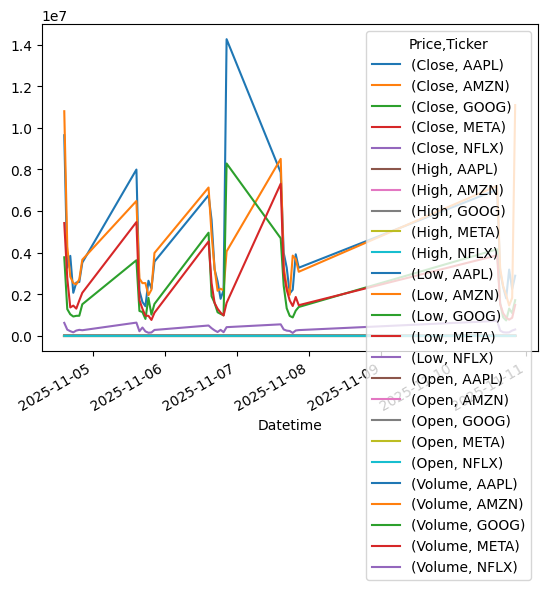

In [11]:
# Just call plot() with no arguments and see what happens
df.plot()

In [12]:
# List of columns of the dataframe
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

In [13]:
# The closing price for Apple.
df[('Close', 'AAPL')]

Datetime
2025-11-04 14:30:00+00:00    268.429993
2025-11-04 15:30:00+00:00    270.609985
2025-11-04 16:30:00+00:00    270.010010
2025-11-04 17:30:00+00:00    270.638397
2025-11-04 18:30:00+00:00    270.510406
2025-11-04 19:30:00+00:00    270.090515
2025-11-04 20:30:00+00:00    270.209991
2025-11-05 14:30:00+00:00    269.010101
2025-11-05 15:30:00+00:00    270.290009
2025-11-05 16:30:00+00:00    269.970001
2025-11-05 17:30:00+00:00    270.119995
2025-11-05 18:30:00+00:00    270.429993
2025-11-05 19:30:00+00:00    269.600006
2025-11-05 20:30:00+00:00    270.109985
2025-11-06 14:30:00+00:00    272.820007
2025-11-06 15:30:00+00:00    272.181488
2025-11-06 16:30:00+00:00    271.424988
2025-11-06 17:30:00+00:00    271.350006
2025-11-06 18:30:00+00:00    271.990112
2025-11-06 19:30:00+00:00    271.209991
2025-11-06 20:30:00+00:00    269.660004
2025-11-07 14:30:00+00:00    271.579987
2025-11-07 15:30:00+00:00    269.529999
2025-11-07 16:30:00+00:00    269.109985
2025-11-07 17:30:00+00:00    26

<Axes: xlabel='Datetime'>

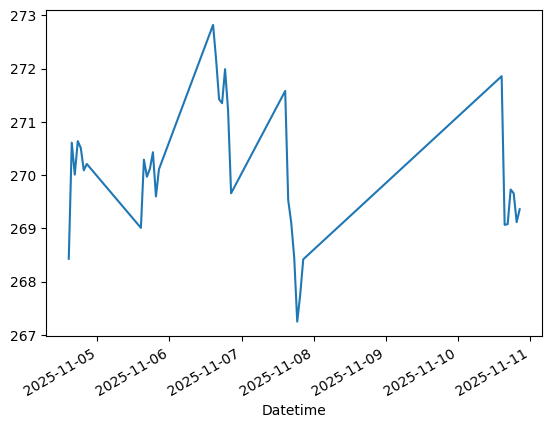

In [14]:
# Plotting the closing price for Apple
df[('Close', 'AAPL')].plot()

<Axes: xlabel='Datetime'>

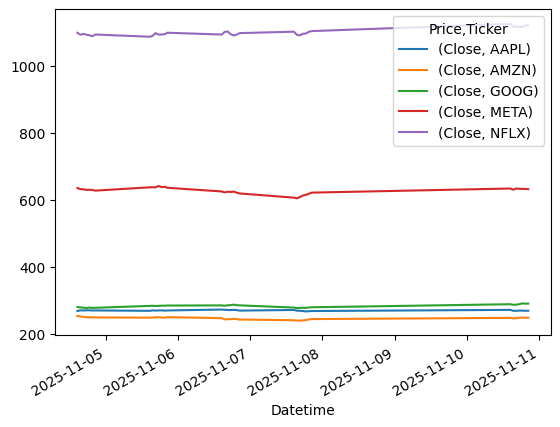

In [15]:
# The closing price for FAANG stocks
df[[('Close', 'AAPL'), ('Close', 'AMZN'), ('Close', 'GOOG'), ('Close', 'META'), ('Close', 'NFLX')]].plot()

In [16]:
# Simplify accessing the 'Close' prices without hard-coding the stock names
df['Close']
print(df['Close'].head(3))

Ticker                           AAPL        AMZN        GOOG        META  \
Datetime                                                                    
2025-11-04 14:30:00+00:00  268.429993  253.389999  280.269989  635.355774   
2025-11-04 15:30:00+00:00  270.609985  252.440094  279.376099  631.979980   
2025-11-04 16:30:00+00:00  270.010010  250.955002  278.250000  631.544983   

Ticker                            NFLX  
Datetime                                
2025-11-04 14:30:00+00:00  1098.313965  
2025-11-04 15:30:00+00:00  1092.555054  
2025-11-04 16:30:00+00:00  1095.069946  


<Axes: xlabel='Datetime'>

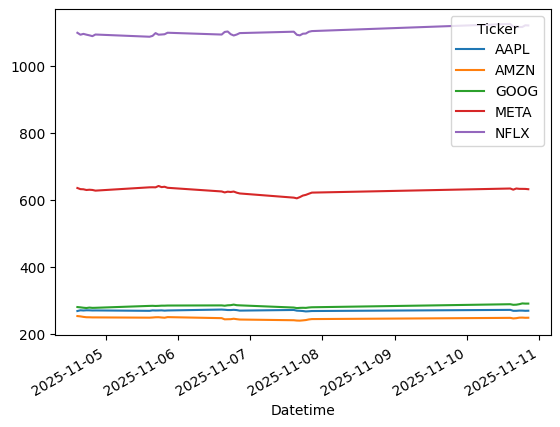

In [17]:
# Plotting the closing prices for all stocks
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
df['Close'].plot()

### - Finding the Latest CSV File  

To work with the most recent dataset, we search the `data` folder for all CSV files using Python’s `glob` module. Each file’s creation time is checked with `os.path.getctime`, and the newest file is selected. If no CSV files exist, the function exits to avoid errors.

In [18]:
import glob
import os

# Find the most recent CSV file in the 'data' folder
# References: 
# https://docs.python.org/3/library/glob.html
# https://docs.python.org/3/library/os.html
# OpenAI

# The 'glob' module searches for all CSV files in the folder
list_of_files = glob.glob("data/*.csv")
# 'os.path.getctime' returns the creation time of the file; 'max' finds the latest one
latest_file = max(list_of_files, key=os.path.getctime)
print(f"Using latest file: {latest_file}")

Using latest file: data/20251111-131731.csv


In [19]:
# Read the most recent CSV file into a DataFrame
# header=[0, 1] handles multi-level columns; index_col=0 sets the first column as the index
df = pd.read_csv(latest_file, header=[0, 1], index_col=0)
df.head(3) # Display the first 3 rows

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-04 14:30:00+00:00  268.429993  253.389999  280.269989  635.355774   
2025-11-04 15:30:00+00:00  270.609985  252.440094  279.376099  631.979980   
2025-11-04 16:30:00+00:00  270.010010  250.955002  278.250000  631.544983   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-11-04 14:30:00+00:00  1098.313965  269.589996  255.440002  281.075012   
2025-11-04 15:30:00+00:00  1092.555054  271.000000  253.565002  281.833588   
2025-11-04 16:30:00+00:00  1095.069946  271.485992  252.535095  279.549988   

Price                                               ...        Open  \
Ticker                           META         NFLX  ...        AAPL   
Datetime                                            ...               
2025-11-04 14:30:00+00:00  641.739929  1104.599854  ...  268.242493   
2025-11-04 15:30:00+00:00  638.799988  1103.500000  ...  268.429993   
2025-11-04 16:30:00+00:00  633.450012  1096.719971  ...  270.640015   

Price                                                                       \
Ticker                           AMZN        GOOG        META         NFLX   
Datetime                                                                     
2025-11-04 14:30:00+00:00  250.380005  277.070007  628.039978  1099.285034   
2025-11-04 15:30:00+00:00  253.369995  280.220490  635.270020  1098.209961   
2025-11-04 16:30:00+00:00  252.429993  279.230011  631.992004  1092.359985   

Price                       Volume                                      
Ticker                        AAPL      AMZN     GOOG     META    NFLX  
Datetime                                                                
2025-11-04 14:30:00+00:00  9645778  10799520  3778209  5424088  626099  
2025-11-04 15:30:00+00:00  3278354   4292114  1285824  2766300  300006  
2025-11-04 16:30:00+00:00  3846826   2839567  1038904  1369778  226854  

[3 rows x 25 columns]

In [20]:
# Convert the index to datetime for better plotting
df.index = pd.to_datetime(df.index)
print(df.index)

DatetimeIndex(['2025-11-04 14:30:00+00:00', '2025-11-04 15:30:00+00:00',
               '2025-11-04 16:30:00+00:00', '2025-11-04 17:30:00+00:00',
               '2025-11-04 18:30:00+00:00', '2025-11-04 19:30:00+00:00',
               '2025-11-04 20:30:00+00:00', '2025-11-05 14:30:00+00:00',
               '2025-11-05 15:30:00+00:00', '2025-11-05 16:30:00+00:00',
               '2025-11-05 17:30:00+00:00', '2025-11-05 18:30:00+00:00',
               '2025-11-05 19:30:00+00:00', '2025-11-05 20:30:00+00:00',
               '2025-11-06 14:30:00+00:00', '2025-11-06 15:30:00+00:00',
               '2025-11-06 16:30:00+00:00', '2025-11-06 17:30:00+00:00',
               '2025-11-06 18:30:00+00:00', '2025-11-06 19:30:00+00:00',
               '2025-11-06 20:30:00+00:00', '2025-11-07 14:30:00+00:00',
               '2025-11-07 15:30:00+00:00', '2025-11-07 16:30:00+00:00',
               '2025-11-07 17:30:00+00:00', '2025-11-07 18:30:00+00:00',
               '2025-11-07 19:30:00+00:00', '2025-1

In [21]:
# Select only the 'Close' prices
close_df = df['Close']
print(close_df.head(3))

Ticker                           AAPL        AMZN        GOOG        META  \
Datetime                                                                    
2025-11-04 14:30:00+00:00  268.429993  253.389999  280.269989  635.355774   
2025-11-04 15:30:00+00:00  270.609985  252.440094  279.376099  631.979980   
2025-11-04 16:30:00+00:00  270.010010  250.955002  278.250000  631.544983   

Ticker                            NFLX  
Datetime                                
2025-11-04 14:30:00+00:00  1098.313965  
2025-11-04 15:30:00+00:00  1092.555054  
2025-11-04 16:30:00+00:00  1095.069946  


### - Complete Function: `plot_data()`    

Below is the final version of the `plot_data()` function that combines all the steps demonstrated earlier. This function opens the most recent CSV file from the `data` folder, plots the `Close` prices for the five FAANG stocks on a single chart with axis labels, a legend, and the current date as the title. The plot is then saved as a timestamped PNG file in the `plots` folder, and the folder is created automatically if it doesn’t already exist.

Using latest file: data/20251111-131731.csv


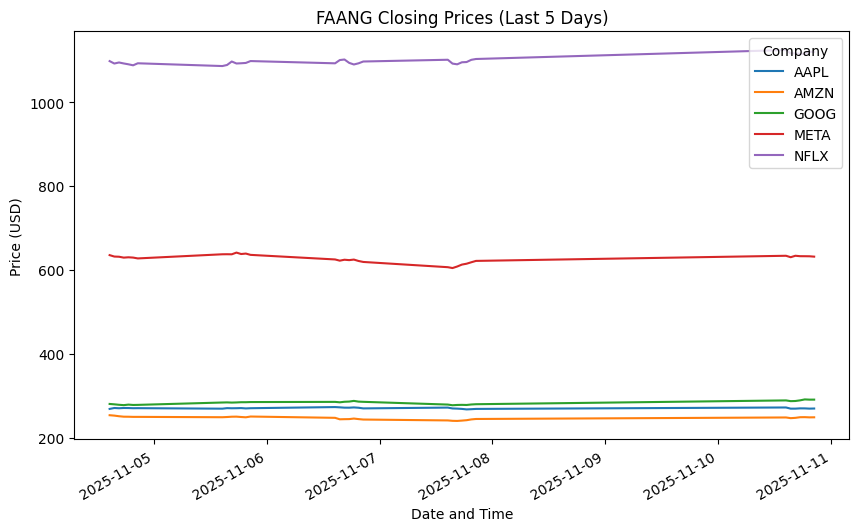

In [22]:
# Script of the `plot_data()` function
#
# References:
# https://matplotlib.org/stable/gallery/index.html
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# https://docs.python.org/3/library/os.html
# https://docs.python.org/3/library/glob.html
# OpenAI

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

def plot_data():
    """
    Opens the latest CSV file in the 'data' folder and plots the 
    closing prices of the FAANG companies using pandas.
    """
    # Find the most recent CSV file in the 'data' folder
    list_of_files = glob.glob("data/*.csv")   
    latest_file = max(list_of_files, key=os.path.getctime)
    print(f"Using latest file: {latest_file}")

    # Read the CSV with multi-level columns (Price, Ticker)
    df = pd.read_csv(latest_file, header=[0, 1], index_col=0)
    
    # Convert the index to datetime for better plotting
    df.index = pd.to_datetime(df.index)
    
    # Select only the 'Close' prices
    close_df = df['Close']
    
    # Plot the closing prices
    close_df.plot(figsize=(10, 6), title="FAANG Closing Prices (Last 5 Days)")
    plt.xlabel("Date and Time")
    plt.ylabel("Price (USD)")
    plt.legend(title="Company")
    plt.show()

# Example usage
plot_data()


---

## 🔹Problem 3: Script  

---

### - Requirements:  

Create a Python script called `faang.py` in the root of your repository.
Copy the above functions into it and it so that whenever someone at the terminal types `./faang.py`, the script runs, downloading the data and creating the plot.
Note that this will require a shebang line and the script to be marked executable.
Explain the steps you took in your notebook.

---

TBD

---

## 🔹Problem 4: Automation  

---

### - Requirements:  

Create a [GitHub Actions workflow](https://docs.github.com/en/actions) to run your script every Saturday morning.
The script should be called `faang.yml` in a `.github/workflows/` folder in the root of your repository.
In your notebook, explain each of the individual lines in your workflow.

---

TBD

---

## End